In [1]:
import os
import scipy.io as sio
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from matplotlib.font_manager import FontProperties

In [40]:
from matplotlib.font_manager import FontProperties
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
def plot_day(Y_test,Y_predict):
#     mpl.rcParams['axes.unicode_minus'] = False
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    lfont = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10)
    x1 = time.strptime('2018-01-01 00:00:00','%Y-%m-%d %X')
    x2 = time.strptime('2018-01-02 00:00:00','%Y-%m-%d %X')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(Y_predict)
    ntick = 24
    delta = (x4 - x3) / ntick
    
    x0 = x3
    xt = [time.strftime('%H:%M',x1)]
    for i in range(ntick-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%H:%M',x00)
        xt.append(x00)
    xt.append('24:00')
              
    x = np.arange(n)
    fig,ax = plt.subplots()
#     plt.plot(x,Y_test,'-k.',x,Y_predict,'-m.')
    plt.plot(x,Y_test,'-k',x,Y_predict,'-m')
    plt.xticks(x, xt, rotation = 90)
    plt.xlabel('时间', fontproperties=font)
    plt.ylabel('车流量  ( Veh / 5 mins )', fontproperties=font)
    plt.legend(labels = ['实际值', '预测值'], loc = 'lower center', prop=lfont)
    
    aticks = np.arange(0,n,12)
    aticks = np.append(aticks, n)    
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)

In [38]:
def plot_week(Y_test,Y_predict):
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    lfont = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10)
    x1 = time.strptime('2018-07-04','%Y-%m-%d')
    x2 = time.strptime('2018-07-09','%Y-%m-%d')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(Y_predict)
    nday = 5
    delta = (x4 - x3) / nday
    
    x0 = x3
    xt = [time.strftime('%m:%d',x1)]
    for i in range(nday-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%m-%d',x00)
        xt.append(x00)
    xt.append('07-09')
              
    x = np.arange(n)
    fig,ax = plt.subplots()
    plt.plot(x,Y_test,'-k',x,Y_predict,'-m')
    plt.xticks(x, xt)
    plt.xlabel('日期', fontproperties=font)
    plt.ylabel('车流量  ( Veh / 5 mins )', fontproperties=font)
    plt.legend(labels = ['实际值', '预测值'], loc = 'lower right', prop=lfont)
    
    aticks = np.arange(0,n,12*24)
    aticks = np.append(aticks, n)
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)

In [8]:
file_path="./models/LSTM"
file_results="results"
results=sio.loadmat(os.path.join(file_path, file_results))
y_target = results['y_target']
print(y_target.shape)
y_predict = results['y_predict']
print(y_predict.shape)
mape = results['mape']
print(mape.shape)
mae = results['mae']
print(mae.shape)
rmse = results['rmse']
print(rmse.shape)

(2880, 69)
(2880, 69)
(1, 2000)
(1, 2000)
(1, 2000)


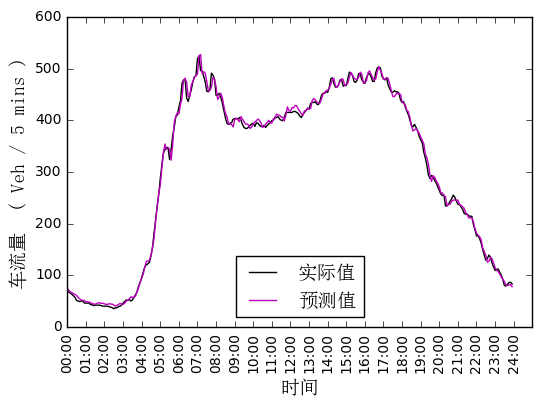

In [32]:
plot_day(y_target[:288, 17]*1188,y_predict[:288, 17]*1188)

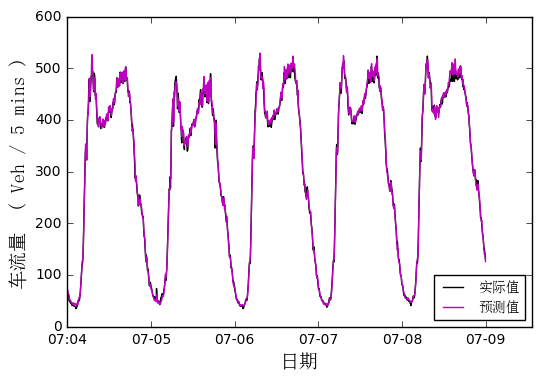

In [39]:
plot_week(y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188)

In [47]:
def plot_all(day_test, day_pred, week_test, week_pred, name):
    plt.rcParams["figure.figsize"]=[10,4]
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    lfont = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=8)
    x1 = time.strptime('2018-01-01 00:00:00','%Y-%m-%d %X')
    x2 = time.strptime('2018-01-02 00:00:00','%Y-%m-%d %X')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(day_pred)
    ntick = 12
    delta = (x4 - x3) / ntick
    
    x0 = x3
    xt = [time.strftime('%H:%M',x1)]
    for i in range(ntick-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%H:%M',x00)
        xt.append(x00)
    xt.append('24:00')
              
    x = np.arange(n)
    ax = plt.subplot(1,2,1)
    
#     plt.plot(x,Y_test,'-k.',x,Y_predict,'-m.')
    plt.plot(x,day_test,'-k',x,day_pred,'-m')
    plt.xticks(x, xt, rotation = 90)
    plt.xlabel('时间', fontproperties=font)
    plt.ylabel('车流量  ( Veh / 5 mins )', fontproperties=font)
    plt.legend(labels = ['实际值', '预测值'], loc = 'lower center', prop=lfont)
    
    aticks = np.arange(0,n,24)
    aticks = np.append(aticks, n)    
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)
    
    
    x1 = time.strptime('2018-07-04','%Y-%m-%d')
    x2 = time.strptime('2018-07-09','%Y-%m-%d')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(week_pred)
    nday = 5
    delta = (x4 - x3) / nday
    
    x0 = x3
    xt = [time.strftime('%m:%d',x1)]
    for i in range(nday-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%m-%d',x00)
        xt.append(x00)
    xt.append('07-09')
              
    x = np.arange(n)
    ax = plt.subplot(1,2,2)
#     plt.subplot(1,2,2)
    plt.plot(x,week_test,'-k',x,week_pred,'-m')
    plt.xticks(x, xt)
    plt.xlabel('日期', fontproperties=font)
    plt.ylabel('车流量  ( Veh / 5 mins )', fontproperties=font)
    plt.legend(labels = ['实际值', '预测值'], loc = 'lower right', prop=lfont)
    
    aticks = np.arange(0,n,12*24)
    aticks = np.append(aticks, n)
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)
    
    plt.savefig("E:/MissDD/ITS实验室/毕业/FIG/"+name+".jpg", format='jpg', bbox_inches='tight')
    

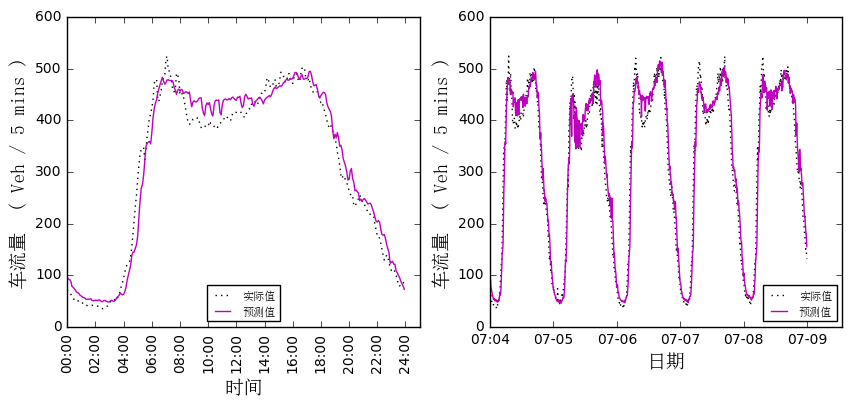

In [46]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_lstm")

In [21]:
file_path="E:\\MissDD\\MachineLearning\\Traffic_Flow_Prediction2"
file_results="Y_test"
results=sio.loadmat(os.path.join(file_path, file_results))
y_target = results['Y_test']
y_target.shape

(2880, 69)

In [39]:
file_path="E:\\MissDD\\MachineLearning\\Traffic_Flow_Prediction2\\mat"
file_results="resultS_MLP"
results=sio.loadmat(os.path.join(file_path, file_results))
y_predict = results['y_predict']
y_predict.shape

(2880, 69)

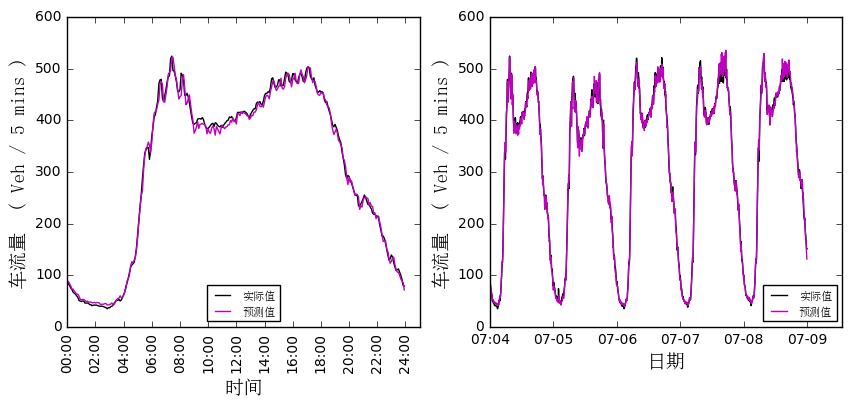

In [26]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_ddbn")

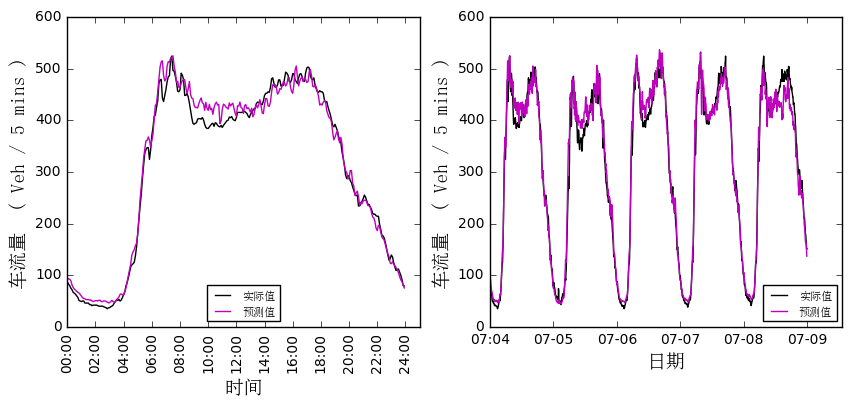

In [28]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_cdbn")

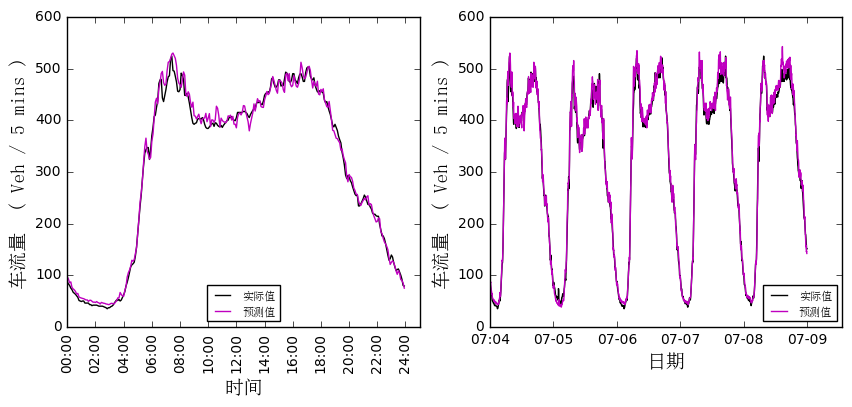

In [30]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_sdae")

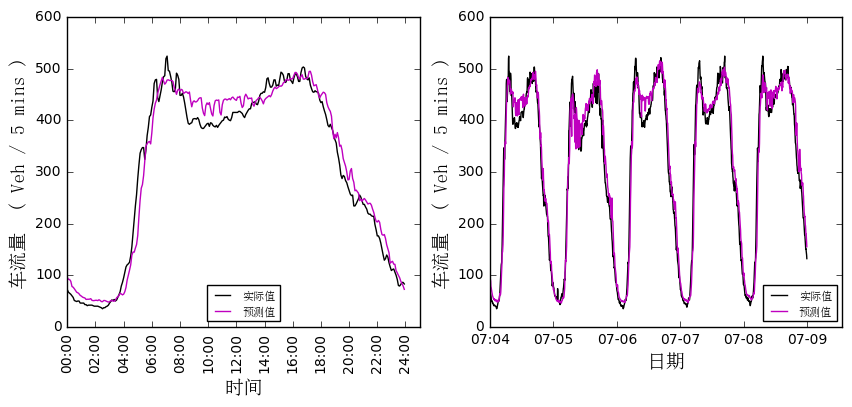

In [40]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_mlp")

In [71]:
file_path="E:\\MissDD\\MachineLearning\\Traffic_Flow_Prediction2\\mat"
file_results="results_GRU"
results=sio.loadmat(os.path.join(file_path, file_results))
y_target = results['y_target']
y_predict = results['y_predict']
y_predict.shape

(2880, 69)

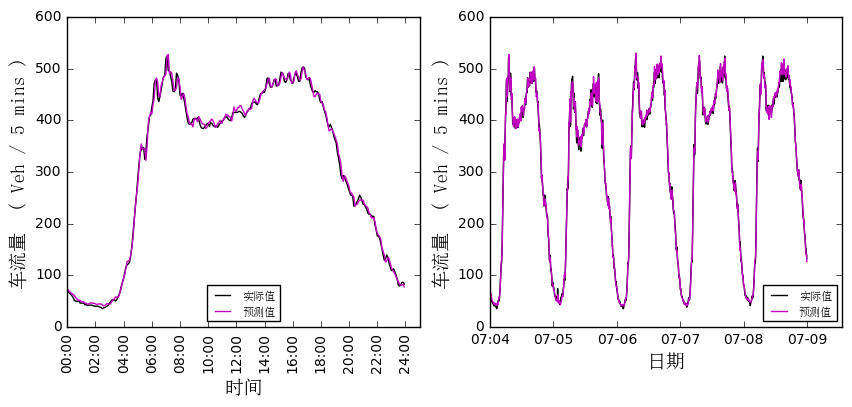

In [54]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_lstm")

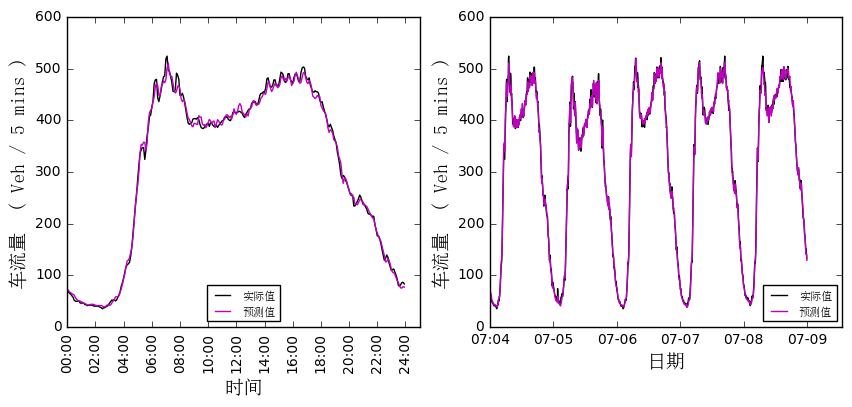

In [70]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_baselstm")

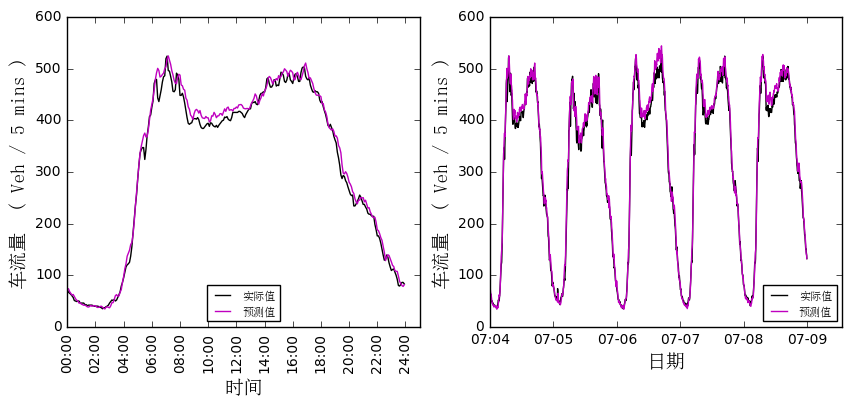

In [49]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_cifg")

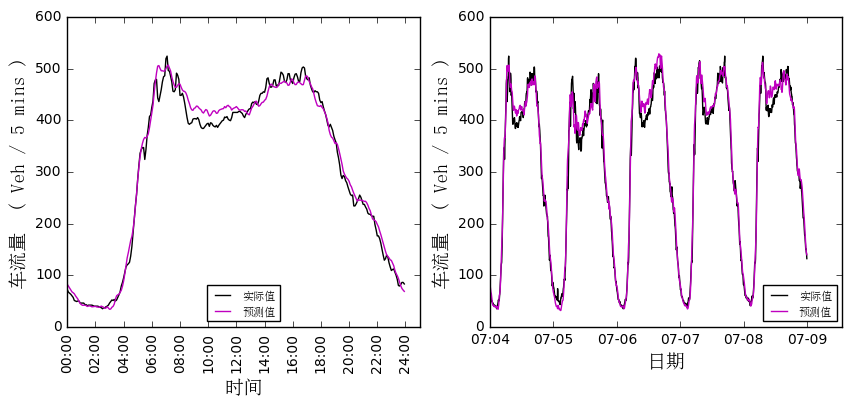

In [66]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_basecifg")

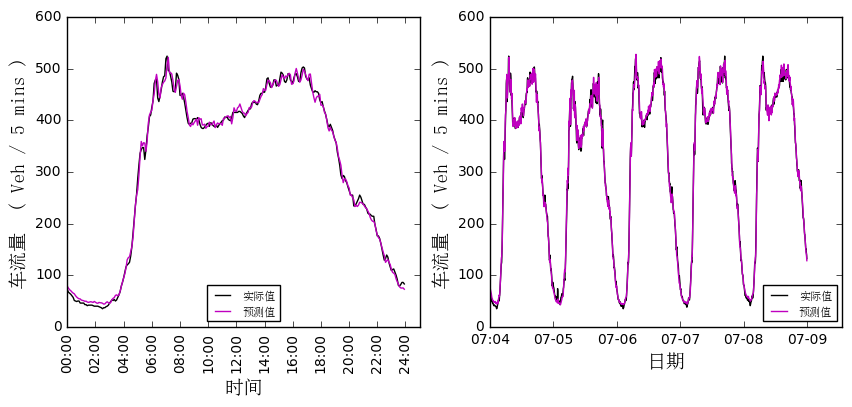

In [72]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_gru")

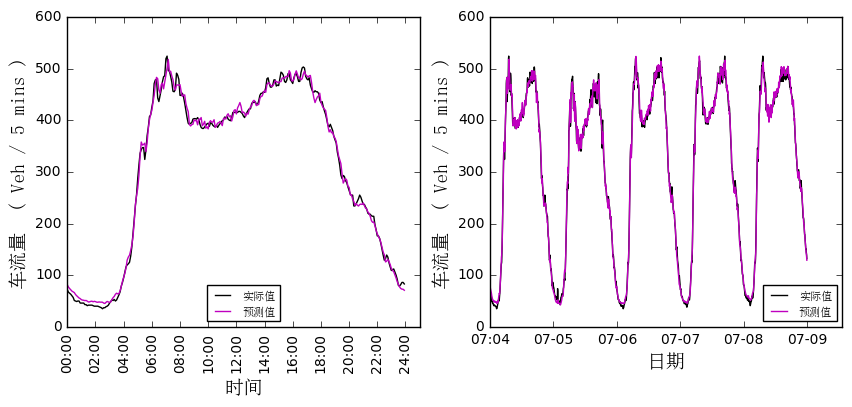

In [68]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_basegru")

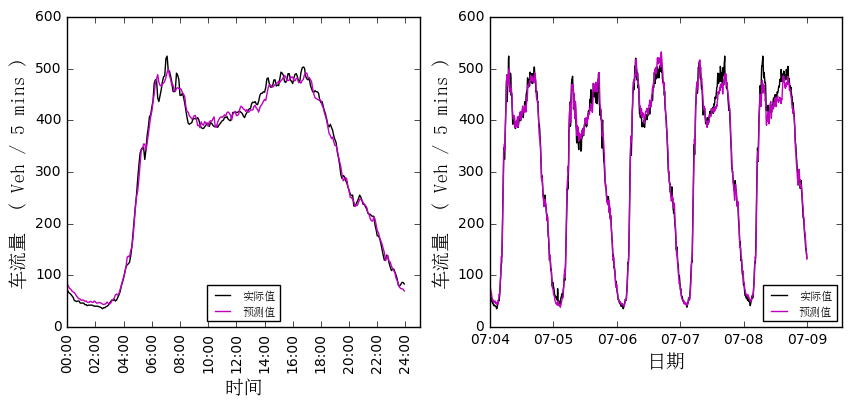

In [38]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_rnn")

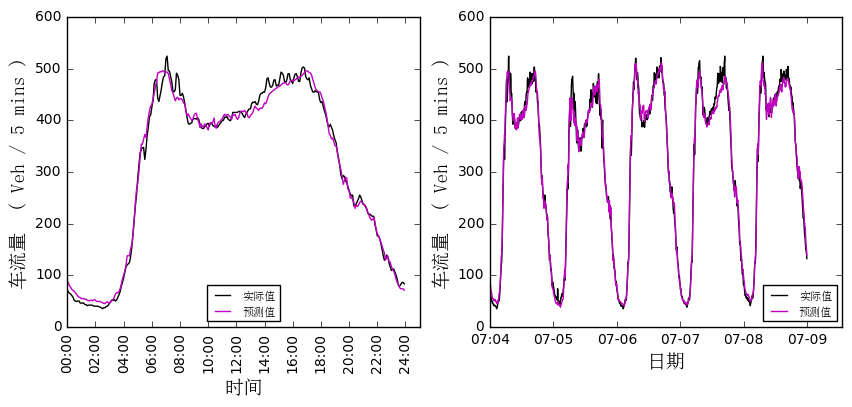

In [64]:
plot_all(y_target[:288, 17]*1188,y_predict[:288, 17]*1188, y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188, "tflow_basernn")